<a href="https://colab.research.google.com/github/lvllvl/segmentation10k/blob/main/Segmentation_11_21_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import os
from os import walk

# Prepare Images

In [25]:
file_path = '/content/drive/MyDrive/projects/datasets/comma10k2/'
imgs = 'imgs'
masks = 'masks'


def get_filenames( file_path, folderName ):

    os.chdir( file_path + folderName )  # change directory 
    fns = [ ] # init data structure for file names 
    
    for ( dirpath, dirnames, filesnames ) in walk( os.curdir ) :

        fns.extend( filesnames )

    return fns

image_fns = get_filenames( file_path, imgs ) 
mask_fns = get_filenames( file_path, masks )

In [49]:
masks_prepped = file_path + 'masks_prepped'
imgs_prepped = file_path + 'imgs_prepped'
len( image_fns ), len( mask_fns ) 

(9888, 9888)

In [51]:
# Open each image
# Resize each image ( 572, 572, 1 )

for i in range( len( image_fns ) ):

    # Prepare filenames - old 
    fn_msk = str( file_path + masks + '/' + mask_fns[ i ] )
    fn_img = str( file_path + imgs + '/' + image_fns[ i ] )

    # Prep filenames - new 
    new_fn_msk = file_path + 'masks_prepped/mask_' + str( mask_fns[i][:4] ) + '.png'
    new_fn_img = file_path + 'imgs_prepped/image_' + str( mask_fns[i][:4] ) + '.png'
    
    # Open file names
    msk_image = cv.imread( fn_msk )
    img_image = cv.imread( fn_img )
    
    W, H, C = img_image.shape # extract the shape

    # Crop the images 
    msk_cropped = msk_image[ 0:W-302, 296: H-296, 1 ]
    img_cropped = img_image[ 0:W-302, 296: H-296, : ]

    # Save the images 
    cv.imwrite(  new_fn_msk, msk_cropped )
    cv.imwrite( new_fn_img, img_cropped ) 

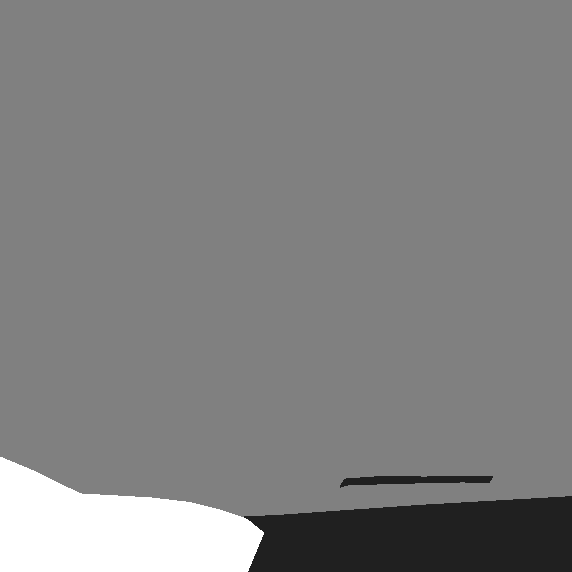